# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Alunos**: Caio Vinicius Rodrigues da Costa e João Victor Teofilo Salgado

**Matriculas:** 201510387 e 201810548

**Turma**: 10A, 14A

Link do repositório GitHub: 

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [372]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import sys

# Aumentando limite para recursão
sys.setrecursionlimit(2000)

# Número de vezes que cada teste será repetido para evitar imprecisões
numero_testes = 10

# Tamanho, crescente, dos conjuntos casos de teste
tamanhos_casos_testes = np.arange(5, 1000, 5, dtype=int)

# Conjunto de casos de testes aleátorios
casos_testes_aleatorios = [np.random.randint(0, caso, caso) for caso in tamanhos_casos_testes]
casos_testes_decrescentes = [np.arange(caso * 5, 0, -5) for caso in tamanhos_casos_testes]
casos_testes_crescentes = [np.arange(0, caso * 5, 5) for caso in tamanhos_casos_testes]
casos_testes_iguais = [np.zeros(caso, dtype=int) for caso in tamanhos_casos_testes]

# Função para realizar o benchmark de uma função
def benchmark(function):
    def wrapper(*args, **kwargs):
        inicio = time.perf_counter()
        resultado = function(*args, **kwargs)
        fim = time.perf_counter()
        tempo_execucao = fim - inicio
        return resultado, tempo_execucao
    return wrapper

# Função para testar uma função de ordenação com base no número de testes
def test(function, caso):
    resultados = [function(caso) for _ in range(numero_testes)]
    tempo_medio = np.mean([resultado[1] for resultado in resultados])
    comparacoes = np.mean([resultado[0] for resultado in resultados])
    return comparacoes, tempo_medio

# Função para executar os testes, retornando os tempos e número de comparações para casos aleatórios, decrescentes e crescentes, respectivamente
def run(function, casos_melhor, casos_medio, casos_pior):
    resultado_aleatorio = [test(function, caso) for caso in casos_melhor]
    resultado_decrescente = [test(function, caso) for caso in casos_medio]
    resultado_crescente = [test(function, caso) for caso in casos_pior]

    tempo_execucao_aleatorio = [resultado[1] for resultado in resultado_aleatorio]
    tempo_execucao_decrescente = [resultado[1] for resultado in resultado_decrescente]
    tempo_execucao_crescente = [resultado[1] for resultado in resultado_crescente]

    comparacoes_aleatorio = [resultado[0] for resultado in resultado_aleatorio]
    comparacoes_decrescente = [resultado[0] for resultado in resultado_decrescente]
    comparacoes_crescente = [resultado[0] for resultado in resultado_crescente]
    return ((tempo_execucao_aleatorio, tempo_execucao_decrescente, tempo_execucao_crescente), (comparacoes_aleatorio, comparacoes_decrescente, comparacoes_crescente))

# Função para plotar os valores gerados
def plot(resultado, label_melhor, label_medio, label_pior):
    ((tempo_execucao_aleatorio, tempo_execucao_decrescente, tempo_execucao_crescente), (comparacoes_aleatorio, comparacoes_decrescente, comparacoes_crescente)) = resultado
    
    plt.plot(tamanhos_casos_testes, tempo_execucao_aleatorio, label=label_melhor)
    plt.plot(tamanhos_casos_testes, tempo_execucao_decrescente, label=label_medio)
    plt.plot(tamanhos_casos_testes, tempo_execucao_crescente, label=label_pior)

    plt.title("Tempo de Execução")
    plt.xlabel("Nº. de amostras") 
    plt.ylabel("Tempo (s)")
    plt.legend(loc="upper left")
    plt.show()

    plt.plot(tamanhos_casos_testes, comparacoes_aleatorio, label=label_melhor)
    plt.plot(tamanhos_casos_testes, comparacoes_decrescente, label=label_medio)
    plt.plot(tamanhos_casos_testes, comparacoes_crescente, label=label_pior)

    plt.title("Comparações")
    plt.xlabel("Nº. de amostras") 
    plt.ylabel("Nº. de Comparações")
    plt.legend(loc="upper left")
    plt.show()


# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [373]:
@benchmark
def insertion_sort(array):
    comparisons = 0
    for i in range(1, len(array)):
        comparisons = comparisons + 1
        key_item = array[i]
        while j >= 0 and array[j] > key_item:
            comparisons = comparisons + 1
            array[j + 1] = array[j]
            j -= 1
        array[j + 1] = key_item

    return comparisons

##  Merge Sort


In [374]:
@benchmark
def merge_sort(array):
    comparisons = 0

    def recursive_merge_sort(array):
        nonlocal comparisons
        if len(array) <= 1:
            comparisons += 1
            return array
        mid = len(array) // 2
        left = recursive_merge_sort(array[:mid])
        right = recursive_merge_sort(array[mid:])
        return merge(left, right)


    def merge(left, right):
        nonlocal comparisons
        if not left:
            comparisons += 1
            return right
        if not right:
            comparisons += 1
            return left
        if left[0] < right[0]:
            comparisons += 1
            return [left[0]] + merge(left[1:], right)
        return [right[0]] + merge(left, right[1:])

    recursive_merge_sort(array)
    return comparisons

##  Selection Sort


In [375]:
@benchmark
def selection_sort(array):
    comparisons = 0
    size = len(array)
    for step in range(size):
        min_idx = step
        for i in range(step + 1, size):
            comparisons = comparisons + 1
            if array[i] < array[min_idx]:
                min_idx = i
        (array[step], array[min_idx]) = (array[min_idx], array[step])
    return comparisons

##  Bubble Sort


In [376]:
@benchmark
def bubble_sort(array):
    comparisons = 0
    n = len(array)

    for i in range(n):
        already_sorted = True
        for j in range(n - i - 1):
            comparisons = comparisons + 1
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
                already_sorted = False
        if already_sorted:
            break

    return comparisons

## Heap Sort

In [377]:
def heapify(array, n, i):
    comparisons = 0
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and array[i] < array[l]:
        largest = l
    if r < n and array[largest] < array[r]:
        largest = r
    if largest != i:
        comparisons += 1
        array[i], array[largest] = array[largest], array[i]
        comparisons += heapify(array, n, largest)
    return comparisons

@benchmark
def heap_sort(array):
    n = len(array)
    comparisons = 0
    for i in range(n, -1, -1):
        heapify(array, n, i)
        comparisons += heapify(array, i, 0)
    for i in range(n - 1, 0, -1):
        array[i], array[0] = array[0], array[i]
        comparisons += heapify(array, i, 0)
    return comparisons

## Quick Sort

> pivo = *A[A-comprimento]*

In [378]:
@benchmark
def quick_sort(array):
    comparisons = 0

    def quick_sort_helper(array, first, last):
        nonlocal comparisons
        if first < last:
            splitpoint = partition(array, first, last)
            quick_sort_helper(array, first, splitpoint - 1)
            quick_sort_helper(array, splitpoint + 1, last)


    def partition(array, first, last):
        nonlocal comparisons
        pivotvalue = array[first]

        leftmark = first + 1
        rightmark = last

        done = False
        while not done:

            while leftmark <= rightmark and array[leftmark] <= pivotvalue:
                leftmark = leftmark + 1
                comparisons = comparisons + 1

            while array[rightmark] >= pivotvalue and rightmark >= leftmark:
                rightmark = rightmark - 1
                comparisons = comparisons + 1

            if rightmark < leftmark:
                done = True
            else:
                temp = array[leftmark]
                array[leftmark] = array[rightmark]
                array[rightmark] = temp

        temp = array[first]
        array[first] = array[rightmark]
        array[rightmark] = temp

        return rightmark
    
    quick_sort_helper(array, 0, len(array) - 1)
    return comparisons

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



# Respostas

## 1.

### Insertion Sort

#### Comportamento Assintótico

- Melhor caso: Os elementos já estão ordenados em ordem crescente. O(n)
- Médio ou pior caso: Os elementos estão distribuídos aleatoriamente. O(n²)

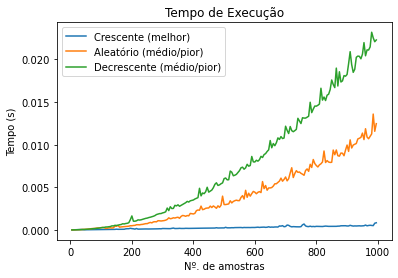

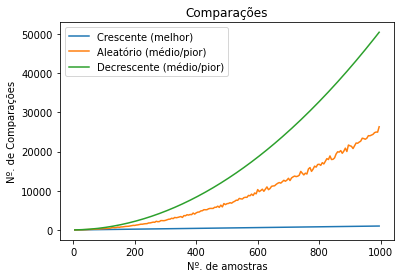

In [379]:
resultado_insertion_sort = run(insertion_sort, casos_testes_crescentes, casos_testes_aleatorios, casos_testes_decrescentes)
plot(resultado_insertion_sort, "Crescente (melhor)", "Aleatório (médio/pior)", "Decrescente (médio/pior)")

### Merge Sort

#### Comportamento Assintótico

- Melhor, médio e pior caso: O estado dos elementos não faz diferença. O(n log(n))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


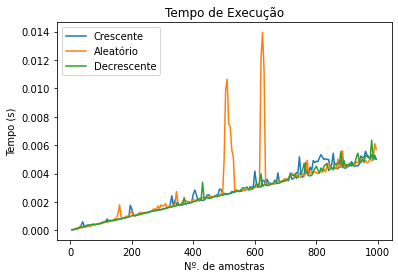

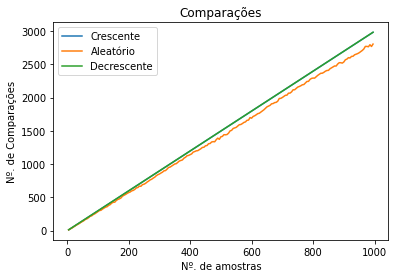

In [380]:
resultado_merge_sort = run(merge_sort, casos_testes_crescentes, casos_testes_aleatorios, casos_testes_decrescentes)
plot(resultado_merge_sort, "Crescente", "Aleatório", "Decrescente")

### Selection Sort

#### Comportamento Assintótico

- Melhor, médio e pior caso: O estado dos elementos não faz diferença. O(n log(n))

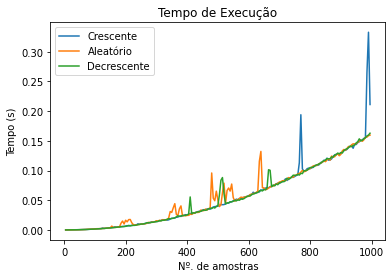

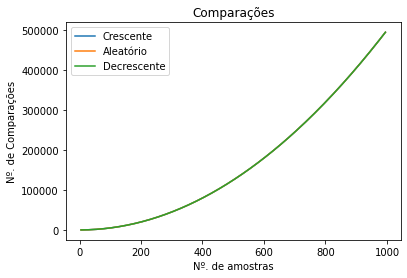

In [381]:
resultado_selection_sort = run(selection_sort, casos_testes_crescentes, casos_testes_aleatorios, casos_testes_decrescentes)
plot(resultado_selection_sort, "Crescente", "Aleatório", "Decrescente")

### Bubble Sort

#### Comportamento Assintótico

- Melhor caso: Os elementos já estão ordenados em ordem crescente. O(n)
- Médio caso: Os elementos estão distribuídos aleatoriamente. O(n²)
- Pior caso: O menor elemento se encontra no fim do arranjo. O(n²)

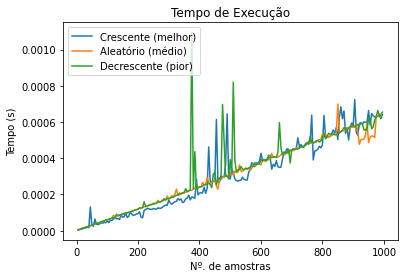

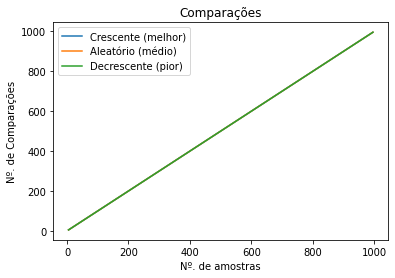

In [382]:
resultado_bubble_sort = run(bubble_sort, casos_testes_crescentes, casos_testes_aleatorios, casos_testes_decrescentes)
plot(resultado_bubble_sort, "Crescente (melhor)", "Aleatório (médio)", "Decrescente (pior)")

### Heap Sort

#### Comportamento Assintótico

- Melhor, médio e pior caso: O estado dos elementos não faz diferença. O(n log(n))

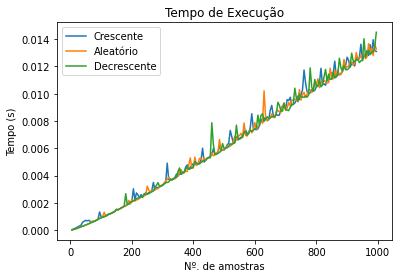

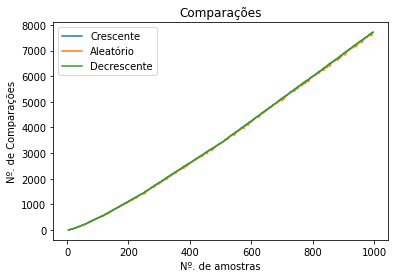

In [383]:
resultado_heap_sort = run(heap_sort, casos_testes_crescentes, casos_testes_aleatorios, casos_testes_decrescentes)
plot(resultado_heap_sort, "Crescente", "Aleatório", "Decrescente")

### Quick Sort

#### Comportamento Assintótico

- Melhor ou médio caso: O arranho se encontra distribuído de forma aleatória. O(n log(n))
- Pior caso: O arranjo se encontra distruído de forma ordenada crescente ou decrescente. O(n²)

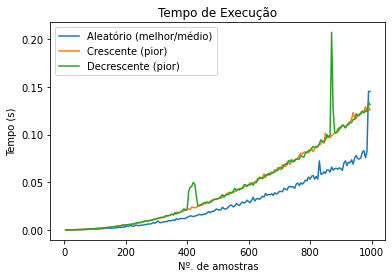

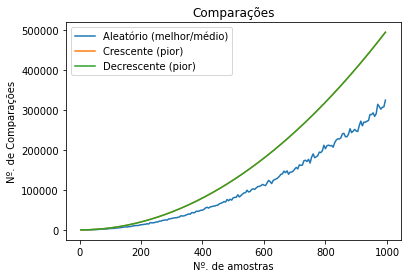

In [384]:
resultado_quick_sort = run(quick_sort, casos_testes_aleatorios, casos_testes_crescentes, casos_testes_decrescentes)
plot(resultado_quick_sort, "Aleatório (melhor/médio)", "Crescente (pior)", "Decrescente (pior)")

### Comparação

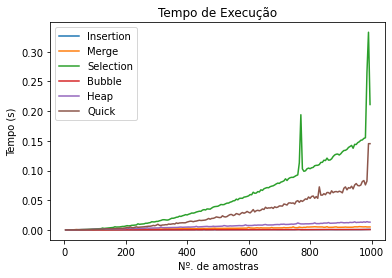

In [385]:
tempo_aleatorio_insertion_sort = resultado_insertion_sort[0][0]
tempo_aleatorio_merge_sort = resultado_merge_sort[0][0]
tempo_aleatorio_selection_sort = resultado_selection_sort[0][0]
tempo_aleatorio_bubble_sort = resultado_bubble_sort[0][0]
tempo_aleatorio_heap_sort = resultado_heap_sort[0][0]
tempo_aleatorio_quick_sort = resultado_quick_sort[0][0]

plt.plot(tamanhos_casos_testes, tempo_aleatorio_insertion_sort, label="Insertion")
plt.plot(tamanhos_casos_testes, tempo_aleatorio_merge_sort, label="Merge")
plt.plot(tamanhos_casos_testes, tempo_aleatorio_selection_sort, label="Selection")
plt.plot(tamanhos_casos_testes, tempo_aleatorio_bubble_sort, label="Bubble")
plt.plot(tamanhos_casos_testes, tempo_aleatorio_heap_sort, label="Heap")
plt.plot(tamanhos_casos_testes, tempo_aleatorio_quick_sort, label="Quick")

plt.title("Tempo de Execução")
plt.xlabel("Nº. de amostras") 
plt.ylabel("Tempo (s)")
plt.legend(loc="upper left")
plt.show()

## 2.

Normalmente utilizados o A[r] como pivô, usando a função aleatória iremos pegar o pivô dentro do intervalo A[p .. r] , Caso tenhamos um vetor ordenado ou quase ordenado ficaremos sempre perto do pior caso pegando o pivo como ultimo elemento, Utilizando o pivô como aleatório garantimos que temos a chance de pegar qualquer número como pivô consiste em 1/n para todos os casos, desde o pior caso até o melhor caso resolvendo assim o problema de rodar o quick sort em vetores ordenados.

In [386]:
@benchmark
def quick_sort_2(array):
    comparisons = 0

    def quick_sort_helper(array, first, last):
        nonlocal comparisons
        if first < last:
            splitpoint = partition(array, first, last)
            quick_sort_helper(array, first, splitpoint - 1)
            quick_sort_helper(array, splitpoint + 1, last)


    def partition(array, first, last):
        nonlocal comparisons
        pivot = random.randint(first, last)
        pivotvalue = array[pivot]

        leftmark = first + 1
        rightmark = last

        done = False
        while not done:

            while leftmark <= rightmark and array[leftmark] <= pivotvalue:
                leftmark = leftmark + 1
                comparisons = comparisons + 1

            while array[rightmark] >= pivotvalue and rightmark >= leftmark:
                rightmark = rightmark - 1
                comparisons = comparisons + 1

            if rightmark < leftmark:
                done = True
            else:
                temp = array[leftmark]
                array[leftmark] = array[rightmark]
                array[rightmark] = temp

        temp = array[first]
        array[first] = array[rightmark]
        array[rightmark] = temp

        return rightmark
    
    quick_sort_helper(array, 0, len(array) - 1)
    return comparisons

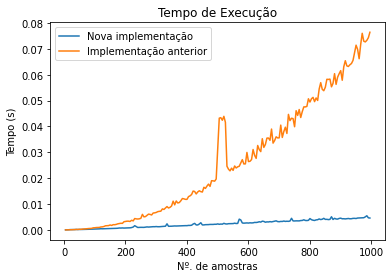

In [387]:
resultado_aleatorio_quick_sort_2 = [test(quick_sort_2, caso)[1] for caso in casos_testes_aleatorios]
resultado_aleatorio_quick_sort = [test(quick_sort, caso)[1] for caso in casos_testes_aleatorios]


plt.plot(tamanhos_casos_testes, resultado_aleatorio_quick_sort_2, label="Nova implementação")
plt.plot(tamanhos_casos_testes, resultado_aleatorio_quick_sort, label="Implementação anterior")

plt.title("Tempo de Execução")
plt.xlabel("Nº. de amostras") 
plt.ylabel("Tempo (s)")
plt.legend(loc="upper left")
plt.show()